In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import sklearn


In [2]:
df = pd.read_csv(r"C:\Users\egimenez\Downloads\llamados-atendidos-violencia-familiar-202110.csv")

# Exploration

In [3]:
df.head()

,caso_id,llamante_descripcion,llamante_genero,llamante_vinculo_ninios_presentes,violencia_tipo,victima_edad,victima_rango_etario,victima_genero,victima_cantidad,agresor_cantidad,agresor_genero,agresor_relacion_victima,llamado_derivacion,llamado_fecha,llamado_hora,llamado_provincia,llamado_provincia_id
0,432086,Comisaría,Masculino,No hay niñas/os,Física y psicológica,43,40 a 49 años,Femenino,1,1,Masculino,Hermano/a,Llamante solicitó información y/o orientación,2021-01-01,2:56,Ciudad Autónoma de Buenos Aires,2
1,432090,Víctima,Masculino,No hay niñas/os,Física y psicológica,65,Más de 60 años,Masculino,2,1,Masculino,Hijo/a,Llamante solicitó información y/o orientación,2021-01-01,8:37,Ciudad Autónoma de Buenos Aires,2
2,346145,Víctima,Femenino,Madre,Física y psicológica,26,18 a 29 años,Femenino,3,1,Masculino,Ex pareja,Llamante solicitó información y/o orientación,2021-01-01,11:16,Ciudad Autónoma de Buenos Aires,2
3,432091,Otra/o sobre una situación de conflicto familiar,NS/NC,NS/NC,No aplica,Sin dato,Sin dato,NS/NC,0,0,NS/NC,NS/NC,Se trata de un conflicto familiar,2021-01-01,11:38,Ciudad Autónoma de Buenos Aires,2
4,432093,NS/NC,Masculino,NS/NC,Psicológica,Sin dato,Sin dato,NS/NC,1,1,NS/NC,NS/NC,Llamante solicitó información y/o orientación,2021-01-01,11:44,Ciudad Autónoma de Buenos Aires,2


In [4]:
df = df.drop(df.columns[[0, 15, 16]], axis = 1)

In [5]:
df.shape

(7801, 14)

In [6]:
df.describe(include = "all")

,llamante_descripcion,llamante_genero,llamante_vinculo_ninios_presentes,violencia_tipo,victima_edad,victima_rango_etario,victima_genero,victima_cantidad,agresor_cantidad,agresor_genero,agresor_relacion_victima,llamado_derivacion,llamado_fecha,llamado_hora
count,7801,7801,7801,7801,7801,7187,7801,7801.000000,7801.000000,7801,7801,7801,7801,7801
unique,12,4,8,8,98,9,4,NaN,NaN,3,12,11,304,1381
top,Víctima,Femenino,NS/NC,Psicológica,Sin dato,Sin dato,Femenino,NaN,NaN,Masculino,NS/NC,Llamante solicitó información y/o orientación,2021-05-06,12:52
freq,3129,4822,2496,3503,4227,3924,4489,NaN,NaN,3916,2240,5298,58,20
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.263684,0.919882,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.112666,0.554576,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN


# Making list of missing values


In [7]:
missing_values = ["Sin dato ", "NS/NC"]
df = pd.read_csv(r"C:\Users\egimenez\Downloads\llamados-atendidos-violencia-familiar-202110.csv", na_values = missing_values)

In [8]:
display(df.dtypes.value_counts)

<bound method IndexOpsMixin.value_counts of caso_id                                int64
llamante_descripcion                  object
llamante_genero                       object
llamante_vinculo_ninios_presentes     object
violencia_tipo                        object
victima_edad                         float64
victima_rango_etario                  object
victima_genero                        object
victima_cantidad                       int64
agresor_cantidad                       int64
agresor_genero                        object
agresor_relacion_victima              object
llamado_derivacion                    object
llamado_fecha                         object
llamado_hora                          object
llamado_provincia                     object
llamado_provincia_id                   int64
dtype: object>

# Adjust data types

In [9]:
df['llamado_fecha'] = pd.to_datetime(df['llamado_fecha'])
df['victima_edad'] = pd.to_numeric(df['victima_edad'])

In [10]:
display(df.dtypes.value_counts)

<bound method IndexOpsMixin.value_counts of caso_id                                       int64
llamante_descripcion                         object
llamante_genero                              object
llamante_vinculo_ninios_presentes            object
violencia_tipo                               object
victima_edad                                float64
victima_rango_etario                         object
victima_genero                               object
victima_cantidad                              int64
agresor_cantidad                              int64
agresor_genero                               object
agresor_relacion_victima                     object
llamado_derivacion                           object
llamado_fecha                        datetime64[ns]
llamado_hora                                 object
llamado_provincia                            object
llamado_provincia_id                          int64
dtype: object>

In [11]:
num_vars = df.columns[df.dtypes != 'object']
cat_vars = df.columns[df.dtypes == 'object']

# Check how many missing values are

In [12]:
df[num_vars].isnull().sum()/len(df) * 100

caso_id                  0.000000
victima_edad            54.185361
victima_cantidad         0.000000
agresor_cantidad         0.000000
llamado_fecha            0.000000
llamado_provincia_id     0.000000
dtype: float64

In [13]:
df[cat_vars].isnull().sum()/len(df) * 100

llamante_descripcion                  5.576208
llamante_genero                      21.048584
llamante_vinculo_ninios_presentes    31.995898
violencia_tipo                        0.000000
victima_rango_etario                 58.172029
victima_genero                       27.932316
agresor_genero                       28.996283
agresor_relacion_victima             28.714267
llamado_derivacion                    0.000000
llamado_hora                          0.000000
llamado_provincia                     0.000000
dtype: float64

# Find and delete calls with majority of missing values

In [14]:
llamante_profesional = df[df['llamante_descripcion'] == 'Profesionales de la Línea 137']


In [15]:
llamante_profesional.isnull().sum()*100 / len(llamante_profesional)

caso_id                                0.0
llamante_descripcion                   0.0
llamante_genero                      100.0
llamante_vinculo_ninios_presentes    100.0
violencia_tipo                         0.0
victima_edad                         100.0
victima_rango_etario                 100.0
victima_genero                       100.0
victima_cantidad                       0.0
agresor_cantidad                       0.0
agresor_genero                       100.0
agresor_relacion_victima             100.0
llamado_derivacion                     0.0
llamado_fecha                          0.0
llamado_hora                           0.0
llamado_provincia                      0.0
llamado_provincia_id                   0.0
dtype: float64

In [16]:
df = df.loc[df['llamante_descripcion'] != 'Profesionales de la Línea 137']

In [17]:
df.shape

(7152, 17)

In [18]:
llamante_otro = df[df['llamante_descripcion'] == 'Otra/o sobre una situación de conflicto familiar']

In [19]:
llamante_otro.isnull().sum()*100 / len(llamante_otro)

caso_id                                0.000000
llamante_descripcion                   0.000000
llamante_genero                       10.559006
llamante_vinculo_ninios_presentes     27.795031
violencia_tipo                         0.000000
victima_edad                         100.000000
victima_rango_etario                 100.000000
victima_genero                       100.000000
victima_cantidad                       0.000000
agresor_cantidad                       0.000000
agresor_genero                       100.000000
agresor_relacion_victima             100.000000
llamado_derivacion                     0.000000
llamado_fecha                          0.000000
llamado_hora                           0.000000
llamado_provincia                      0.000000
llamado_provincia_id                   0.000000
dtype: float64

In [20]:
llamante_otro.shape

(644, 17)

In [21]:
df = df.loc[df['llamante_descripcion'] != 'Otra/o sobre una situación de conflicto familiar']

In [22]:
df.shape

(6508, 17)

In [23]:
llamante_otro2 = df[df['llamante_descripcion'] == 'Otro/a']

In [24]:
llamante_otro2.isnull().sum()*100 / len(llamante_otro2)

caso_id                               0.000000
llamante_descripcion                  0.000000
llamante_genero                      24.681934
llamante_vinculo_ninios_presentes    32.315522
violencia_tipo                        0.000000
victima_edad                         54.707379
victima_rango_etario                 58.269720
victima_genero                        9.923664
victima_cantidad                      0.000000
agresor_cantidad                      0.000000
agresor_genero                       16.030534
agresor_relacion_victima             13.740458
llamado_derivacion                    0.000000
llamado_fecha                         0.000000
llamado_hora                          0.000000
llamado_provincia                     0.000000
llamado_provincia_id                  0.000000
dtype: float64

In [25]:
llamante_otro2.shape

(393, 17)

In [26]:
df = df.loc[df['llamante_descripcion'] != 'Otro/a']

In [27]:
df.shape

(6115, 17)

In [28]:
df[cat_vars].isnull().sum()/len(df) * 100

llamante_descripcion                  7.113655
llamante_genero                      13.540474
llamante_vinculo_ninios_presentes    25.200327
violencia_tipo                        0.000000
victima_rango_etario                 49.321341
victima_genero                       13.851186
agresor_genero                       14.816026
agresor_relacion_victima             14.603434
llamado_derivacion                    0.000000
llamado_hora                          0.000000
llamado_provincia                     0.000000
dtype: float64

In [29]:
df[num_vars].isnull().sum()/len(df) * 100

caso_id                  0.000000
victima_edad            44.464432
victima_cantidad         0.000000
agresor_cantidad         0.000000
llamado_fecha            0.000000
llamado_provincia_id     0.000000
dtype: float64

# Group data by different categories

In [30]:
edad_victima = df.groupby('victima_rango_etario').count()

edad_victima.sort_values(by='caso_id', ascending=False)



,caso_id,llamante_descripcion,llamante_genero,llamante_vinculo_ninios_presentes,violencia_tipo,victima_edad,victima_genero,victima_cantidad,agresor_cantidad,agresor_genero,agresor_relacion_victima,llamado_derivacion,llamado_fecha,llamado_hora,llamado_provincia,llamado_provincia_id
victima_rango_etario,,,,,,,,,,,,,,,,
18 a 29 años,769,764,757,619,769,769,758,769,769,741,743,769,769,769,769,769
30 a 39 años,530,529,529,472,530,530,529,530,530,521,518,530,530,530,530,530
12 a 17 años,429,421,410,354,429,429,418,429,429,413,414,429,429,429,429,429
Más de 60 años,385,380,378,343,385,385,384,385,385,366,376,385,385,385,385,385
40 a 49 años,378,378,375,334,378,378,375,378,378,366,367,378,378,378,378,378
06 a 11 años,223,218,214,209,223,223,223,223,223,213,213,223,223,223,223,223
0 a 5 años,201,194,190,189,201,201,197,201,201,182,182,201,201,201,201,201
50 a 59 años,184,184,182,159,184,184,184,184,184,180,181,184,184,184,184,184


Text(0.5, 0, 'Rango etario de la víctima')

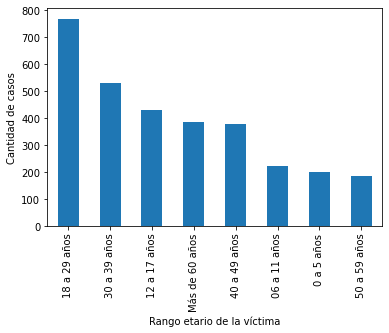

In [55]:
edad_victima.sort_values(by = "caso_id", ascending = False).plot.bar(y = 'caso_id', legend=None)
plt.ylabel("Cantidad de casos")
plt.xlabel("Rango etario de la víctima")



In [32]:
derivacion = df.groupby('llamado_derivacion').count()

derivacion.sort_values(by='caso_id', ascending=False)

,caso_id,llamante_descripcion,llamante_genero,llamante_vinculo_ninios_presentes,violencia_tipo,victima_edad,victima_rango_etario,victima_genero,victima_cantidad,agresor_cantidad,agresor_genero,agresor_relacion_victima,llamado_fecha,llamado_hora,llamado_provincia,llamado_provincia_id
llamado_derivacion,,,,,,,,,,,,,,,,
Llamante solicitó información y/o orientación,4917,4494,4105,3476,4917,2534,2320,4132,4917,4917,4070,4066,4917,4917,4917,4917
No se desplazó un Equipo móvil por tratarse de un caso fuera de CABA,704,696,694,644,704,488,439,662,704,704,666,679,704,704,704,704
La víctima no aceptó la intervención del Equipo Móvil,195,195,194,182,195,167,153,193,195,195,191,193,195,195,195,195
No había móviles y/o Equipos para realizar la intervención,97,97,97,91,97,68,58,93,97,97,94,94,97,97,97,97
Está interviniendo o se deriva a otra institución,74,73,72,69,74,42,40,65,74,74,67,68,74,74,74,74
Desplazamiento de un Equipo Móvil a donde se encontraba la/s víctima/s,53,51,52,48,53,44,40,51,53,53,51,51,53,53,53,53
Se planificó intervención para otro momento,45,45,45,37,45,32,30,45,45,45,42,43,45,45,45,45
Comunicación con los Equipos Móviles,20,20,20,19,20,17,17,19,20,20,18,19,20,20,20,20
Se trata de un conflicto familiar,6,6,5,5,6,3,2,5,6,6,6,6,6,6,6,6


In [33]:
agresor_victima = df.groupby('agresor_relacion_victima').count()
agresor_victima.sort_values(by='caso_id', ascending=False)

,caso_id,llamante_descripcion,llamante_genero,llamante_vinculo_ninios_presentes,violencia_tipo,victima_edad,victima_rango_etario,victima_genero,victima_cantidad,agresor_cantidad,agresor_genero,llamado_derivacion,llamado_fecha,llamado_hora,llamado_provincia,llamado_provincia_id
agresor_relacion_victima,,,,,,,,,,,,,,,,
Pareja,1165,1143,1099,941,1165,689,633,1127,1165,1165,1129,1165,1165,1165,1165,1165
Ex pareja,1085,1077,1057,959,1085,621,578,1056,1085,1085,1059,1085,1085,1085,1085,1085
Madre,898,868,811,754,898,591,528,786,898,898,887,898,898,898,898,898
Padre,706,692,640,560,706,506,460,644,706,706,696,706,706,706,706,706
Hijo/a,509,496,479,426,509,317,290,494,509,509,491,509,509,509,509,509
Hermano/a,341,339,323,260,341,224,203,323,341,341,333,341,341,341,341,341
Otro/a no conviviente,201,199,193,164,201,129,119,194,201,201,190,201,201,201,201,201
Otro/a conviviente,154,148,132,119,154,93,84,135,154,154,121,154,154,154,154,154
Padrastro,120,117,106,102,120,77,71,108,120,120,119,120,120,120,120,120


Text(0.5, 0, 'Relación del agresor con la víctima')

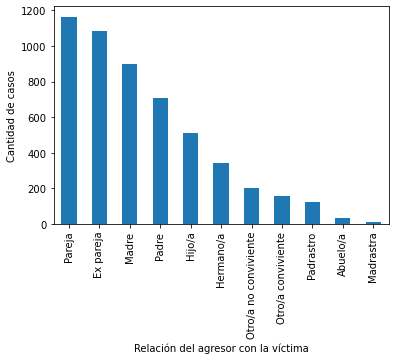

In [36]:
agresor_victima.sort_values(by = "caso_id", ascending = False).plot.bar(y = 'caso_id', legend=None)
plt.ylabel("Cantidad de casos")
plt.xlabel("Relación del agresor con la víctima")

In [69]:
tipo_violencia = df.groupby('violencia_tipo').count()

tipo_violencia.sort_values(by='caso_id', ascending=False)

,caso_id,llamante_descripcion,llamante_genero,llamante_vinculo_ninios_presentes,victima_edad,victima_rango_etario,victima_genero,victima_cantidad,agresor_cantidad,agresor_genero,agresor_relacion_victima,llamado_derivacion,llamado_fecha,llamado_hora,llamado_provincia,llamado_provincia_id
violencia_tipo,,,,,,,,,,,,,,,,
Psicológica,3306,2971,2690,2274,1577,1427,2662,3306,3306,2561,2579,3306,3306,3306,3306,3306
Física y psicológica,2514,2426,2312,2047,1630,1505,2326,2514,2514,2369,2367,2514,2514,2514,2514,2514
"Física, sexual y psicológica",102,98,99,87,73,62,96,102,102,98,97,102,102,102,102,102
Económica y psicológica,84,82,82,71,48,41,82,84,84,79,79,84,84,84,84,84
"Económica, Física y psicológica",78,76,76,70,50,47,76,78,78,74,73,78,78,78,78,78
"Física, psicológica y económica",21,21,20,19,14,14,20,21,21,21,20,21,21,21,21,21
No aplica,7,4,6,3,2,2,4,7,7,4,4,7,7,7,7,7
"Física, sexual, psicológica y económica",3,2,2,3,2,1,2,3,3,3,3,3,3,3,3,3


In [79]:
quien_llama = df.groupby('llamante_descripcion').count()

quien_llama.sort_values(by='caso_id', ascending=False)

,caso_id,llamante_genero,llamante_vinculo_ninios_presentes,violencia_tipo,victima_edad,victima_rango_etario,victima_genero,victima_cantidad,agresor_cantidad,agresor_genero,agresor_relacion_victima,llamado_derivacion,llamado_fecha,llamado_hora,llamado_provincia,llamado_provincia_id
llamante_descripcion,,,,,,,,,,,,,,,,
Víctima,3129,2889,2321,3129,1875,1714,2862,3129,3129,2819,2827,3129,3129,3129,3129,3129
Familiar,1383,1263,1200,1383,809,721,1273,1383,1383,1243,1250,1383,1383,1383,1383,1383
Vecina/o,567,435,464,567,202,187,426,567,567,470,464,567,567,567,567,567
Comisaría,397,390,368,397,350,328,388,397,397,384,388,397,397,397,397,397
Otra institución,140,135,107,140,84,79,135,140,140,132,128,140,140,140,140,140
Hospital,37,37,32,37,29,27,37,37,37,36,37,37,37,37,37,37
Agresor/a,25,25,19,25,10,10,23,25,25,24,25,25,25,25,25,25
Defensoría,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


# What is the relationship between gender and agression?

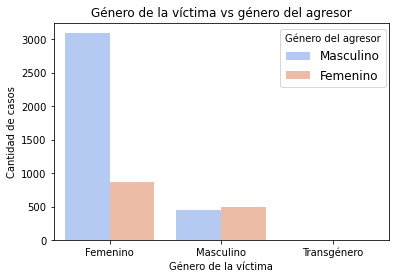

In [73]:
sns.countplot( x = 'victima_genero', hue = 'agresor_genero', palette = "coolwarm", data = df)
plt.title('Género de la víctima vs género del agresor')
plt.xlabel("Género de la víctima")
plt.ylabel("Cantidad de casos")

plt.legend(fontsize = 12, \
               bbox_to_anchor= (1.01, 1), \
               title="Género del agresor", \
               title_fontsize = 10)
